In [1]:
import numpy as np
from scipy.special import sici
import filon
import matplotlib.pyplot as plt
import time
times={}

In [6]:
def testFunc(x,r,a,b):
    return np.log(a*x/b)*np.cos(x*r)

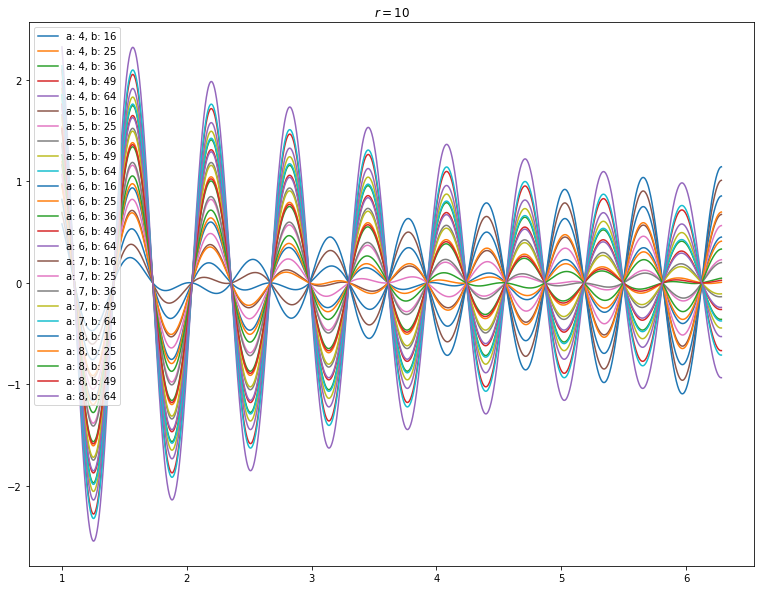

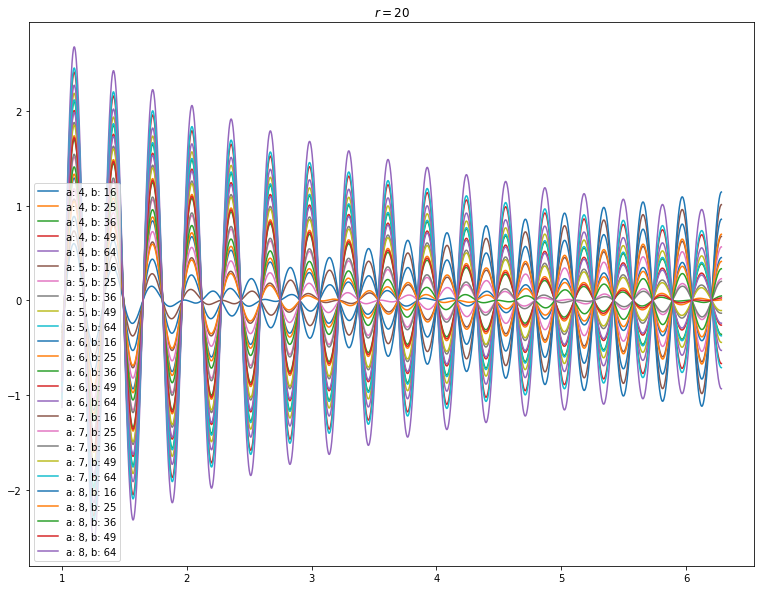

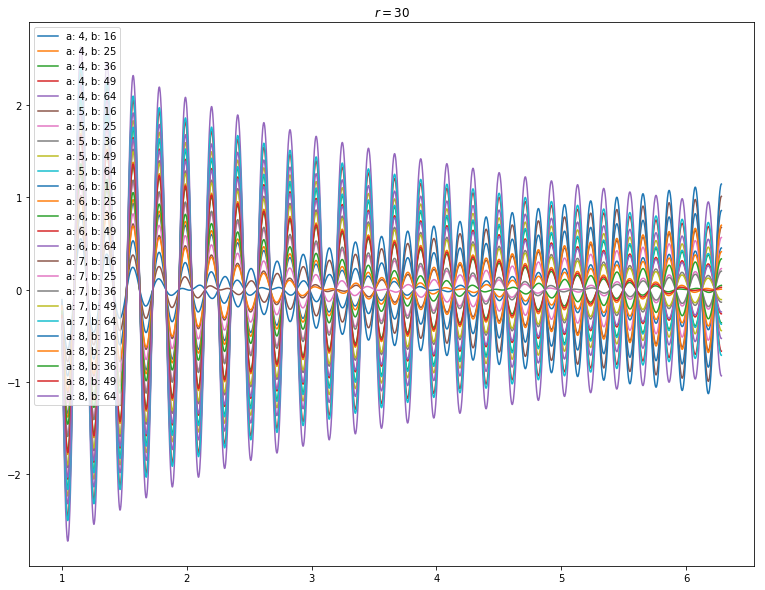

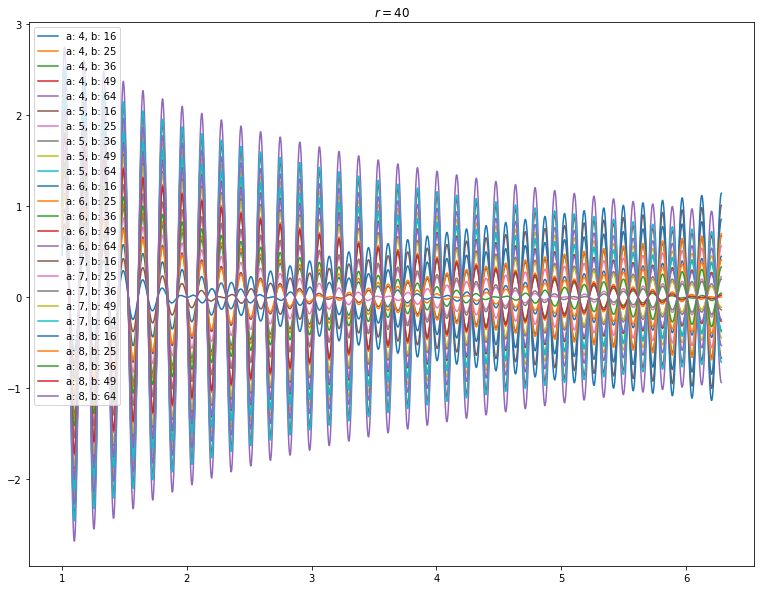

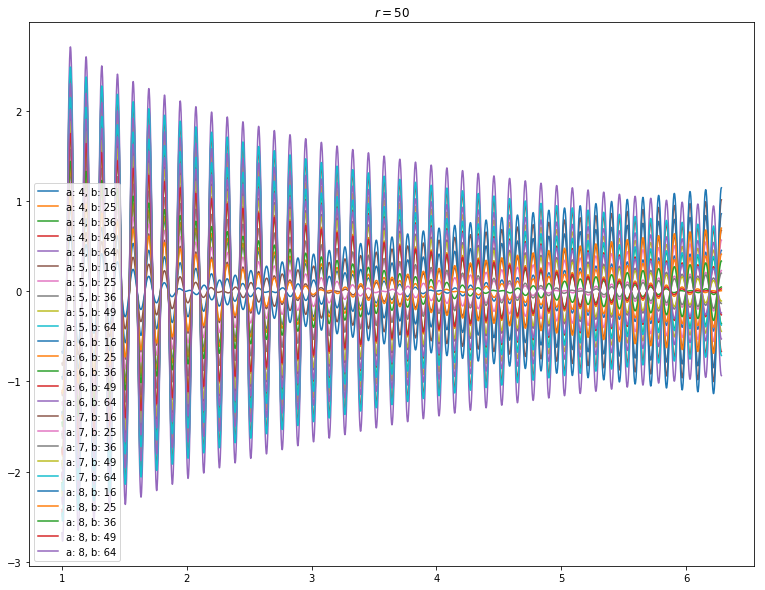

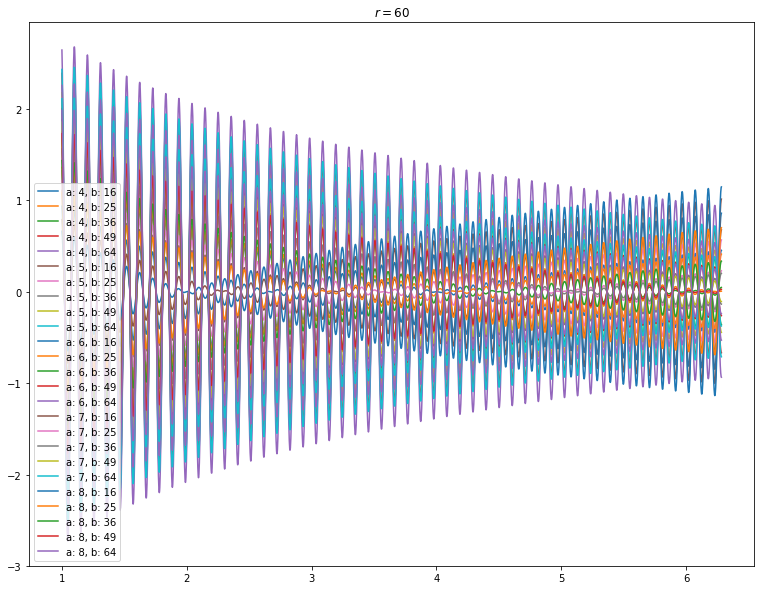

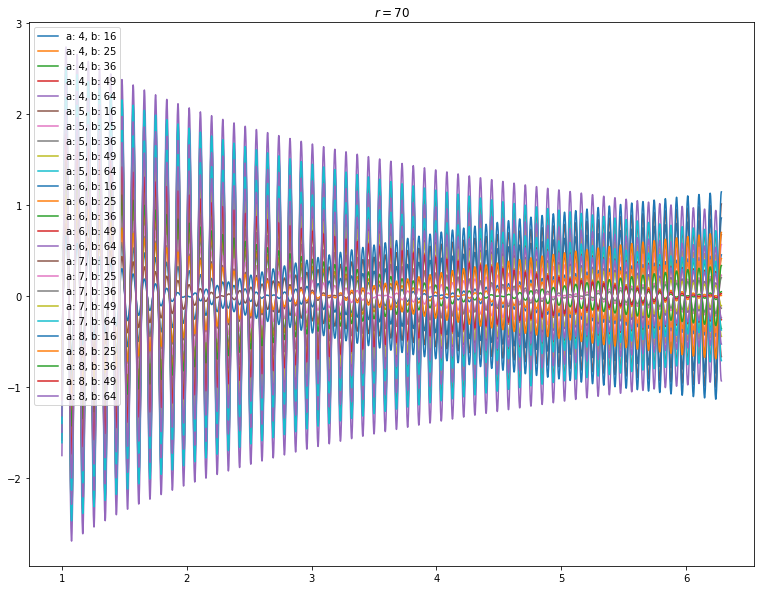

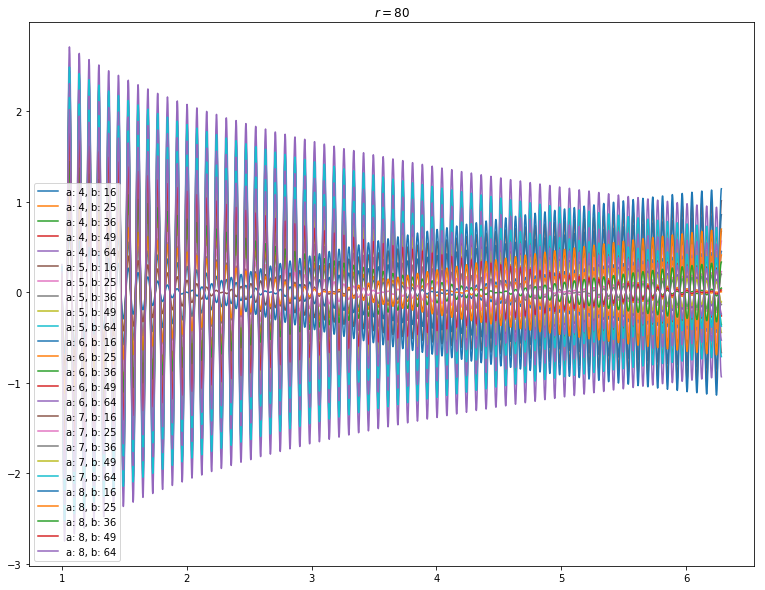

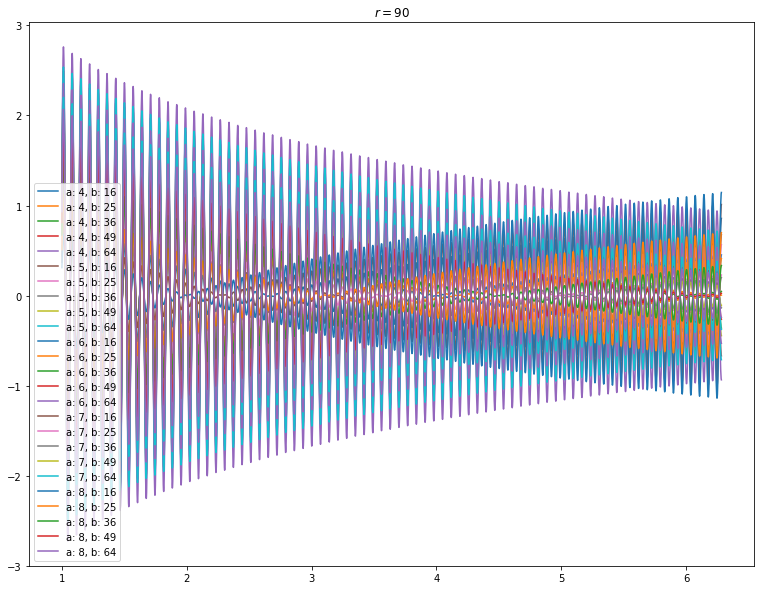

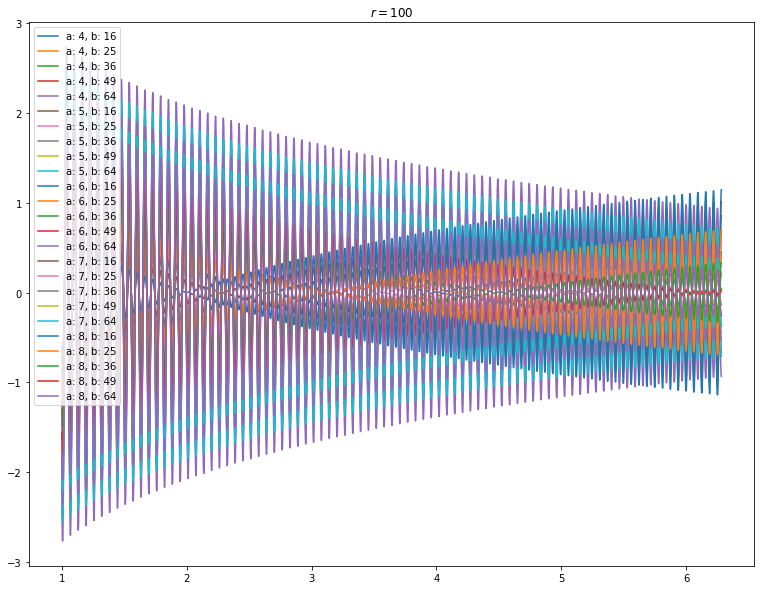

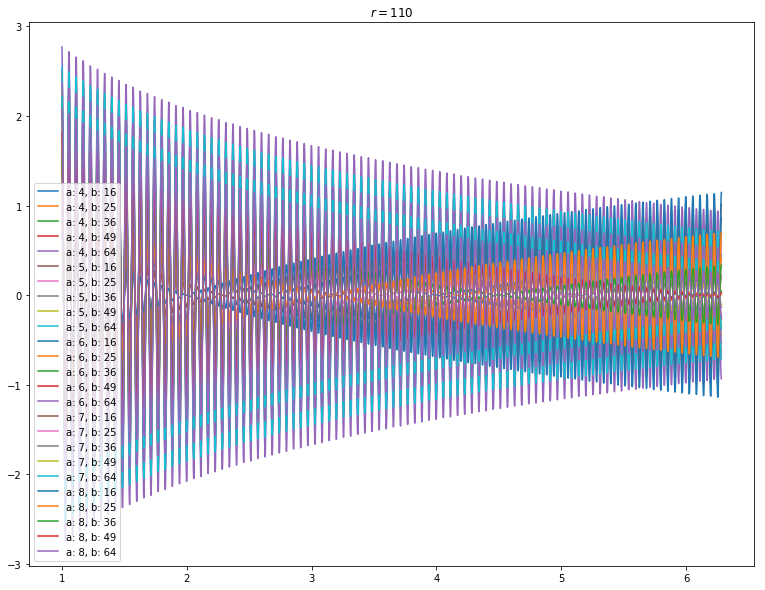

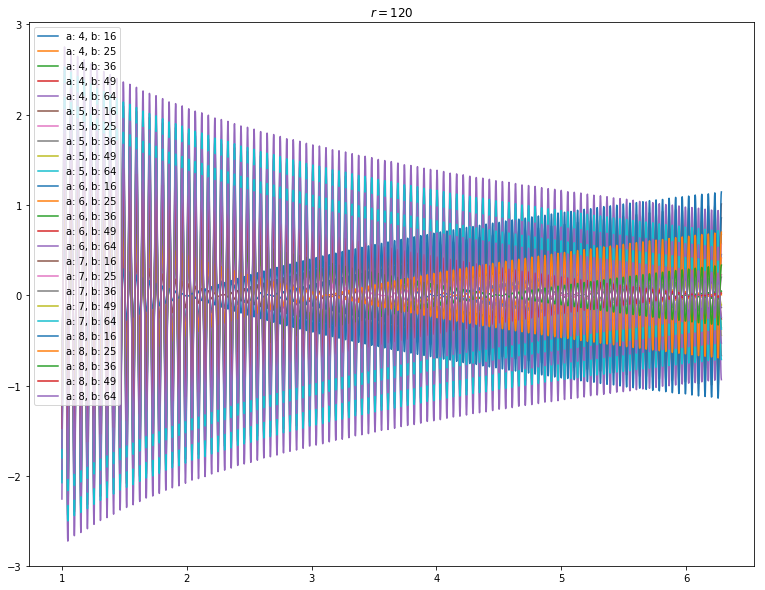

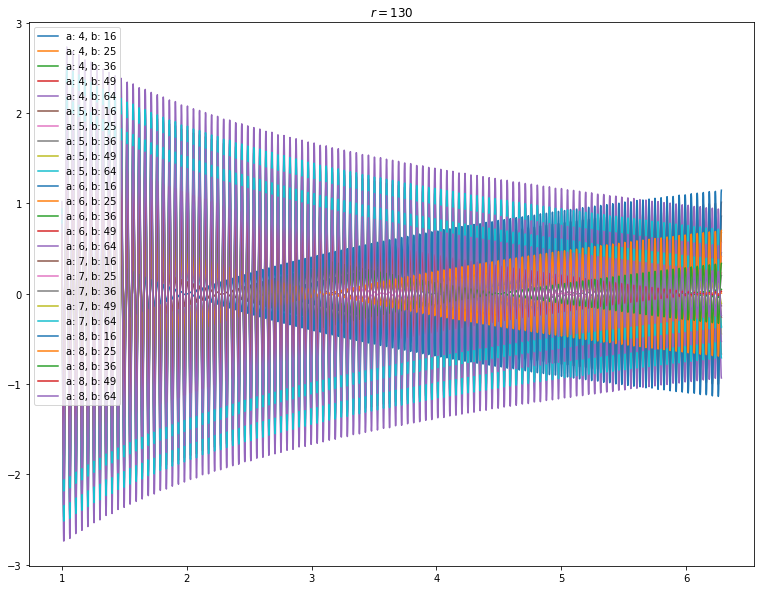

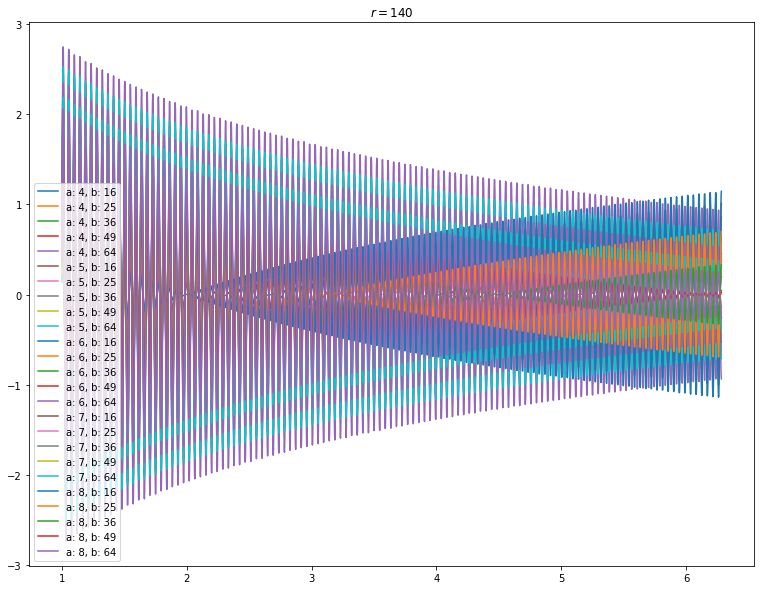

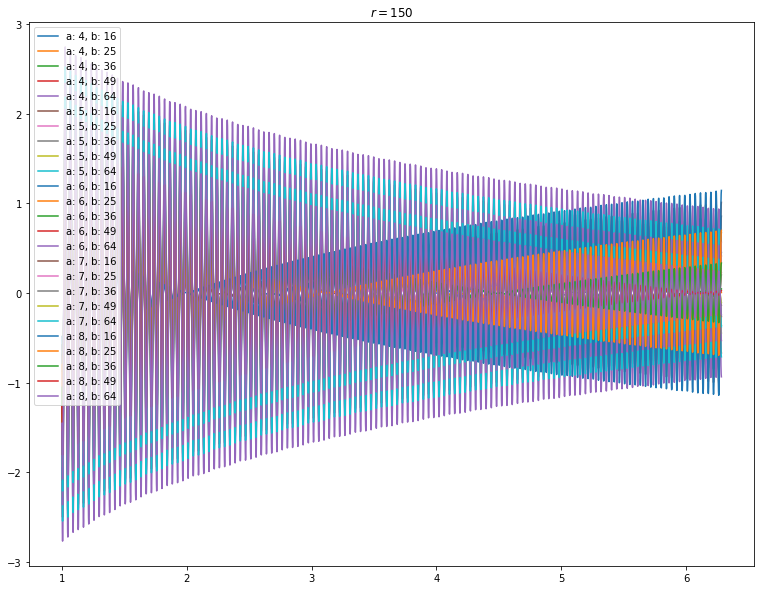

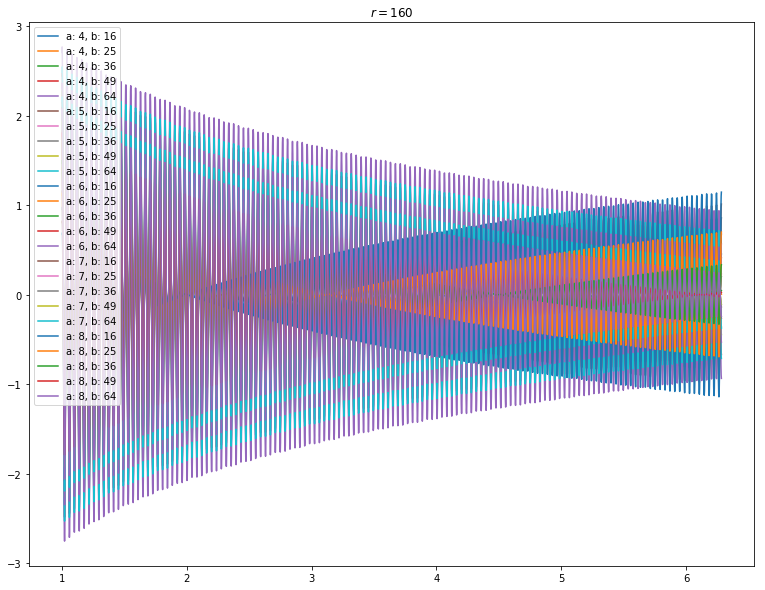

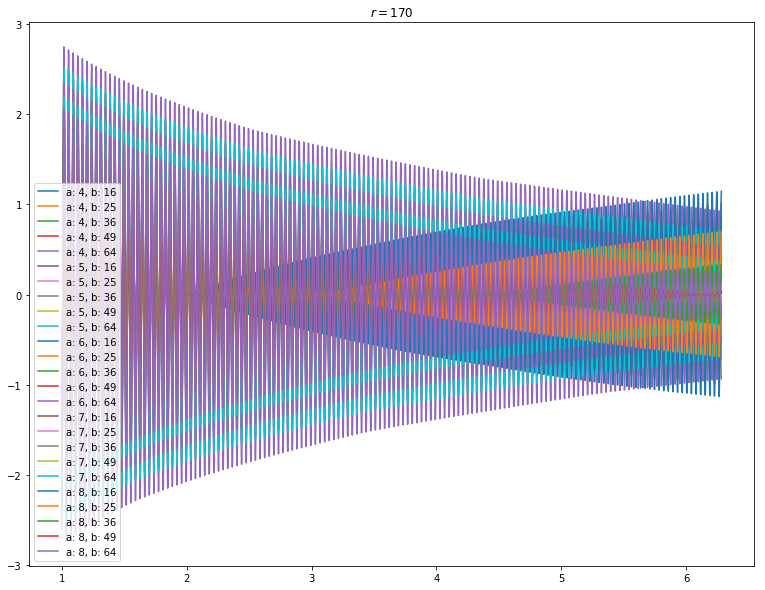

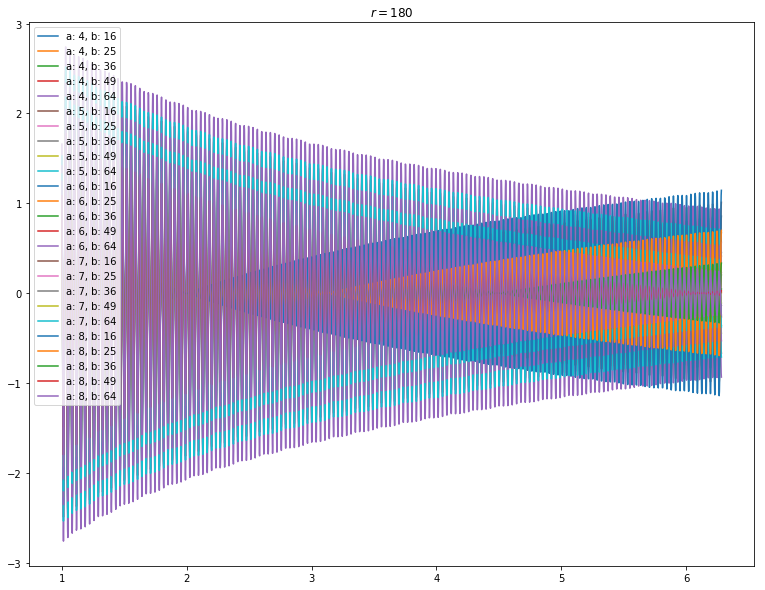

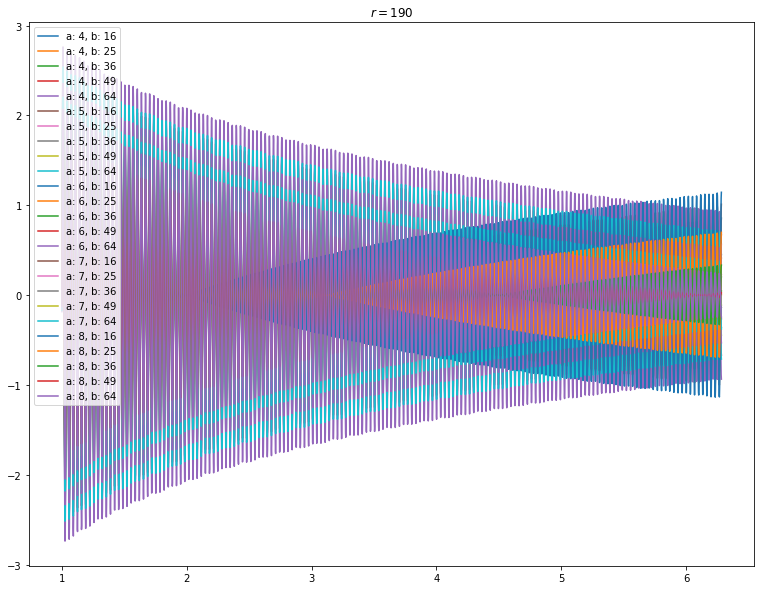

In [7]:
args = np.linspace(1,2.0*np.pi,3000)
for el in np.arange(10,200,10):
    fig = plt.figure(figsize=(13,10))
    for el2 in [4,5,6,7,8]:
        for el3 in [16,25,36,49,64]:
            vals = testFunc(args,el,el2,el3)
            plt.plot(args,vals,label="a: %s, b: %s"%(el2,el3))
    plt.title("$r = %s$"%el)
    plt.legend()
    plt.show()


In [8]:
def exactINDEF(r,a,b,x):
    an=a/b
    return (np.log(an*x)*np.sin(r*x) - sici(r*x)[0])/r

def exact(r,a,b,low,up):
    return exactINDEF(r,a,b,up) - exactINDEF(r,a,b,low)



exact solution
-------------

In [10]:
rArr = np.arange(10,200,1)
aArr = np.arange(101) + np.ones(101)
bArr = aArr**2
rGrid = rArr[:,np.newaxis]
aGrid = aArr[np.newaxis,:]
bGrid = bArr[np.newaxis,:]


In [11]:
start = time.time()
resEall = exact(rGrid,aGrid,bGrid,1,2.0*np.pi)
end = time.time() - start
times['exactAll'] = end

filon integration
------------

In [12]:
def integrand(a,b,x):
    return np.log(a*x/b)

def filonIntAll(r,a,b,low,up,n=1001): 
    aGrid = a[np.newaxis,:]
    bGrid = b[np.newaxis,:]
    args,steps = np.linspace(low,up,n,retstep=True,endpoint=True)
    argsGrid = args[:,np.newaxis]
    intArr = integrand(aGrid,bGrid,argsGrid)
    #print intArr.shape
    res = filon.cos_integral(intArr,steps,r,low,axis=0)
    #print a.shape
    return res

In [ ]:
start = time.time()
resFall = filonIntAll(rArr,aArr,bArr,1,2.0*np.pi)
end = time.time() - start
times['filonAll'] = end